In [18]:
import pandas as pd
import seaborn as sns

In [35]:
df = pd.read_csv('data/modified/data_to_map.csv')

In [36]:
df.head()

,Unnamed: 0,coords,weight
0,0,"(44.2917947, -93.3045992)",94
1,1,"(44.8787181, -93.38103)",91
2,2,"(45.1170803, -93.2164146)",35
3,3,"(43.6435327, -93.3647928)",157
4,4,"(44.0689429, -92.4763802)",168


In [37]:
# remove junk from coords
df['coords'] = df['coords'].str.replace('(', '').str.replace(')', '')

# Split the tuple column 'coords' into two separate columns 'latitude' and 'longitude'
df[['latitude','longitude']] = df['coords'].str.split(',', expand=True)
# set data type
df = df.astype({'latitude':'float64', 'longitude':'float64'})

# Drop the original 'coords' column
df.drop('coords', axis=1, inplace=True)

C:\Users\johnd_h4rxswp\AppData\Local\Temp\ipykernel_13008\344440211.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['coords'] = df['coords'].str.replace('(', '').str.replace(')', '')


In [38]:
min_val = df['weight'].min()

In [39]:
# max all weights positive
df['weight'] = df['weight'] + min_val

In [ ]:
# TODO code to fiddle with
# https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html
f, ax = plt.subplots(1, figsize=(9, 9))
# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=bbox[0],urcrnrlat=bbox[1],
            llcrnrlon=bbox[2],urcrnrlon=bbox[3])
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

<Axes: xlabel='latitude', ylabel='longitude'>

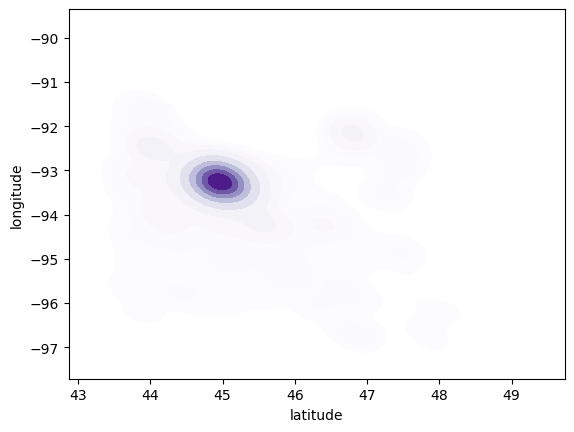

In [19]:
# Create a kernel density plot with latitude and longitude as the x and y axes, respectively
# The weights column is used to weight the density estimate
sns.kdeplot(data=df, x='latitude', y='longitude', weights='weight', fill=True, cmap='Purples')

In [75]:
# read in county data
import geopandas as gpd
import matplotlib.pyplot as plt

shp_df = gpd.read_file('data/original/shp_bdry_counties_in_minnesota/mn_county_boundaries.shp')

In [76]:
 hennepin = shp_df[shp_df['CTY_NAME']=='Hennepin']

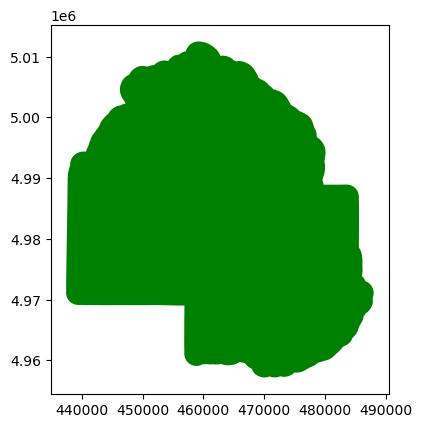

In [77]:
# create 2km buffer around hennepin county
buffered_hennepin = hennepin.buffer(2000)
ax = hennepin.plot(color='red')

buffered_hennepin.plot(ax=ax, color='green')
plt.show()



In [79]:
# TODO see which lat/longs are within
from shapely.geometry import Point
# df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])] 

# del df['Unnamed: 0']
# df.head()

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))


gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:26915')

In [80]:
gdf['within_2km_hennepin'] = gdf.within(buffered_hennepin)

C:\Users\johnd_h4rxswp\anaconda3\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [81]:
filtered_df = gdf[gdf['within_2km_hennepin'] == True]
filtered_df.head()

,Unnamed: 0,weight,latitude,longitude,geometry,within_2km_hennepin
49,49,-475,44.8662,-93.442159,POINT (465070.085 4968182.184),True
